In [ ]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
!pip install pingouin
import pingouin as pg

# DATASET

In [ ]:
data = pd.read_csv('marketing_campaign.csv',delimiter='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## DATA UNDERSTANDING

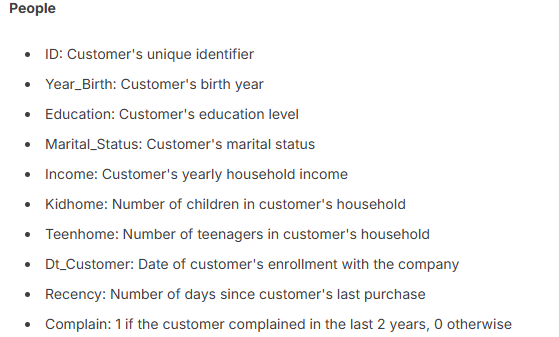

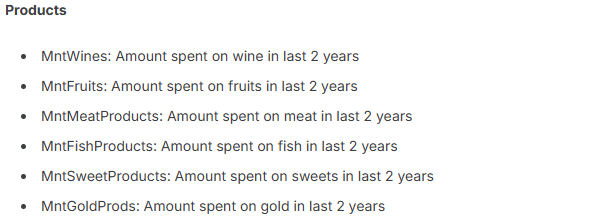

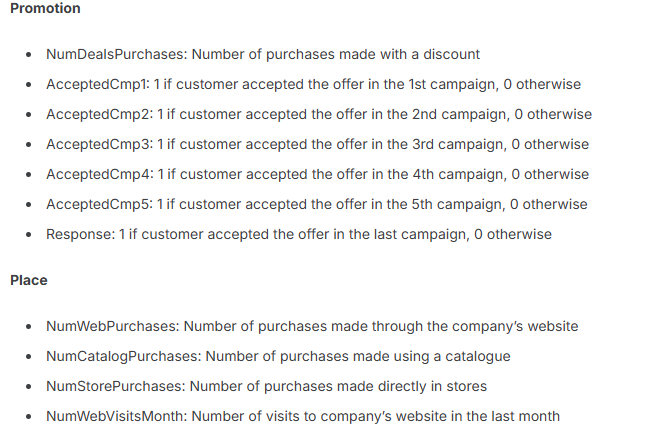

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Pada data market campaign terdapat data yang missing value dimana pada variabel
Income. Pada dataset juga terdapat 24 variabel numerik dan 3 variabel kategori.
Karena terdapat missing values pada variabel income, maka dilakukan handling missing value.

#Pengecekan dan Handling Missing Values

In [ ]:
#Cek missing value
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Persentase missing value variabel income
round(data['Income'].isna().sum()/len(data)*100,2)

1.07

karena persentase missing value pada variabel **Income** sebesar 1,07% yang kurang dari 20%, maka dilakukan handling missing value. Handling missing value dilakukan menggunakan pendekatan median, karena bisa tahan terhadap outlier, sekaligus variabel **Income** merupakan variabel numerik.
- Alasan tidak dilakukan drop value adalah umumnya variabel tersebut masih cukup representatif untuk dipertahankan, sehingga lebih baik menggunakan pendekatan seperti imputasi (median) daripada membuang data.

# Handling Missing Value dengan pendekatan median

In [ ]:
#Memanggil data selain NaN
data_selain = (data[(~data['Income'].isna())]['Income'])

In [ ]:
len(data_selain)

2216

In [ ]:
median = data_selain.median()
median

51381.5

In [ ]:
#fill menggunakan median
data['Income'] = data['Income'].apply(lambda x: median if pd.isna(x) else x)

In [ ]:
#cek missing value kembali
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Variabel Income sudah bebas dari missing value dan sudah diimputasi menggunakan pendekatan median

# Pengecekan Outlier
Menggunakan pendekatan IQR dan boxplot untuk visualisasinya.

## PENDAPATAN

In [ ]:
#PENDAPATAN
IQR = data['Income'].quantile(0.75) - data['Income'].quantile(0.25)
print(f'IQR dari pendapatan sebesar : {IQR}')

IQR dari pendapatan sebesar : 32751.0


In [ ]:
#Outlier
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_lower = data[data['Income'] < lower]
outlier_upper = data[data['Income'] > upper]
outliers = pd.concat([outlier_lower, outlier_upper])
print("Jumlah Outliers:")
print(len(outliers))

Jumlah Outliers:
8


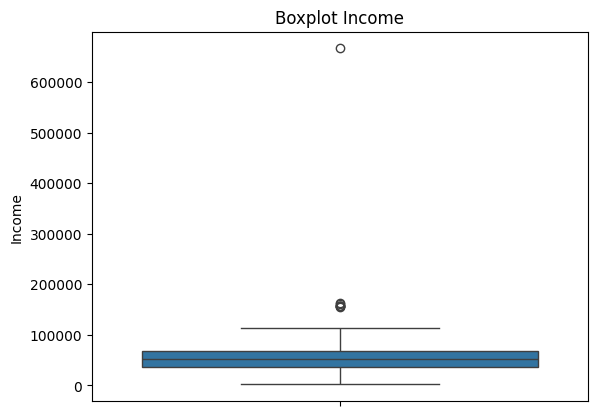

In [ ]:
#boxplot
sns.boxplot(data['Income'])
plt.title('Boxplot Income')
plt.show()

- Secara perhitungan pendekatan IQR, untuk **variabel Income** terdapat 8 outlier
- Secara visualisasi menggunakan boxplot, untuk **variabel Income** terdapat outlier dilihat dari titik-titik yang di atas batas nilai maksimum.

Sehingga, dalam kasus ini sebenarnya dihandling, namun karena setelah dicek, 8 data **Income** cukup dikit yang outlier dan bisa jadi sebagai informasi penting terkait pendapatan setiap orang, maka tidak dilakukan handling outlier/ drop data.

## RECENCY

In [ ]:
#recency
IQR = data['Recency'].quantile(0.75) - data['Recency'].quantile(0.25)
print(f'IQR dari Recency sebesar : {IQR}')

IQR dari Recency sebesar : 50.0


In [ ]:
#Outlier
Q1 = data['Recency'].quantile(0.25)
Q3 = data['Recency'].quantile(0.75)
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_lower = data[data['Recency'] < lower]
outlier_upper = data[data['Recency'] > upper]
outliers = pd.concat([outlier_lower, outlier_upper])
print("Jumlah Outliers:")
print(len(outliers))

Jumlah Outliers:
0


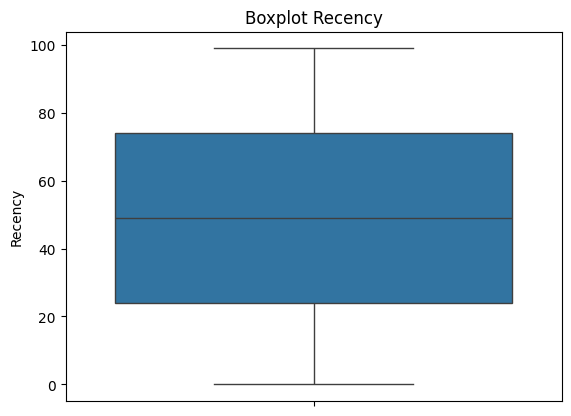

In [ ]:
#boxplot
sns.boxplot(data['Recency'])
plt.title('Boxplot Recency')
plt.show()

- Secara perhitungan pendekatan IQR, untuk **variabel Recency** tidak terdapat outlier
- Secara visualisasi menggunakan boxplot, untuk **variabel Recency** tidak terdapat outlier dilihat dari titik-titik yang di atas batas nilai maksimum.

Sehingga, tidak perlu dilakukan handling outlier/ drop data pada variabel **Recency**

# STATISTIKA DESKRIPTIF

In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## INCOME

In [ ]:
#PENDAPATAN
median = data['Income'].median()
print(f'Nilai median dari pendapatan sebesar : {median}')

Nilai median dari pendapatan sebesar : 51381.5


## RECENCY

In [ ]:
#recency
median = data['Recency'].median()
print(f'Nilai median dari Recency sebesar : {median}')

Nilai median dari Recency sebesar : 49.0


## TINGKAT PENDIDIKAN

In [ ]:
#EDUCATION
data['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


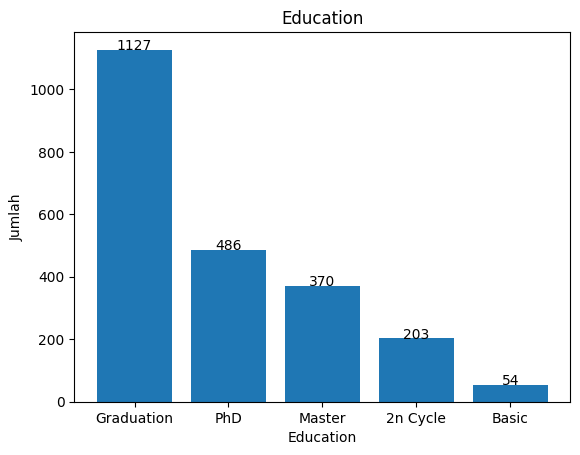

In [ ]:
#visualisasi Education barplot
import matplotlib.pyplot as plt
plt.bar(data['Education'].value_counts().index, data['Education'].value_counts().values)
for i in range(len(data['Education'].value_counts().index)):
    plt.text(i, data['Education'].value_counts().values[i], data['Education'].value_counts().values[i], ha='center')
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
#modus
data['Education'].mode()

,Education
0,Graduation


## Kesimpulan Statistika Deskriptif

Variabel Pendapatan -->
- Secara keseluruhan pada dataset pelanggan menunjukkan bahwa rerata pendapatan rumah tangga tahunan pelanggan sebesar 52237.975446. Selain itu, dapat kita lihat bahwa nilai standar deviasi yang didapatkan sebesar 25037.955891. Artinya, bahwa nilai pendapatan tersebut bisa berpotensi menyimpang dari reratanya kurang lebih 25037.955891.
- Nilai minimumnya pelanggan untuk pendapatan rumah tangga tahunan sebesar 1730, sedangkan maksimumnya sebanyak 666666. Artinya, pelanggan ternyata memiliki pendapatan yang bervariatif, ada yang kelas bawah hingga kelas atas.
- Nilai median pendapatan sebesar 51381.5 dimana menunjukkan bahwa nilai median mendekati rata-rata.
- Ada beberapa pelanggan dengan pendapatan rumah tangga tahunan yang terindikasi data ekstrem (outlier), karena datanya dibawah batas minimum atau di atas maksimum. Ternyata, berdasarkan boxplot untuk data ekstrem di atas nilai maksimum.
- Dari visualisasi boxplot kita bisa tau bahwa lebar boxplot kecil yang mana menunjukkan variasi datanya kecil, cenderung menuju kehomogenan atau cenderung mendekati median data-datanya atau tidak ada perbedaan yang cukup besar untuk nilai pendapatan.


Variabel Pendidikan -->
- Secara keseluruhan, data pelanggan yang paling banyak adalah dengan tingkat pendidikan Graduation atau baru lulus sebanyak 1127 pelanggan, sedangkan yang paling sedikit adalah tingkat pendidikan basic sebanyak 54 pelanggan.
- Modus terbanyak atau paling sering muncul atau yang paling banyak menjadi pelanggan adalah dengan status pendidikan Graduation.

Variabel Recency -->
- Secara keseluruhan, jumlah hari pelanggan melakukan transaksi terakhir rata-ratanya pada 49,109 ~ 49 hari. Dengan nilai standar deviasinya sebesar 28,96 ~29 hari. Hal ini, menunjukkan bahwa potensi menyimpang mendekati rata-rata lurang lebih sebesar 28,96 hari untuk jumlah hari pelanggan melakukan transaksi terakhir.
- Diperkuat juga melihat dari boxplot bahwa lebar boxplot cukup besar dimana data begitu variatif sehingga cenderung variansnya besar. Selain itu, juga tidak ada data ekstrem (outlier), artinya data masih berada di antara batas minimum dan maksimum.
- Nilai median sebesar 49 hari dimana nilainya mendekati rata-rata (hampir sama).

# KORELASI

In [ ]:
## Korelasi hubungan antara Pendapatan dengan Recency
korel = data[['Income','Recency']]
korel.corr()

,Income,Recency
Income,1.000000,-0.004061
Recency,-0.004061,1.000000


Korelasi antara Recency terhadap Pendapatan menunjukkan bahwa korelasinya negatif sebesar -0,004061, artinya bahwa tingkat hubungan recency dengan pendapatan ini **sangat lemah** karena mendekati 0 dan arahnya negatif (ke bawah)

In [ ]:
## Encoding Tingkat Pendidikan
def encoding(x):
  if x == 'Graduation':
    return 1
  elif x == 'PhD':
    return 2
  elif x == 'Master':
    return 3
  elif x == 'Basic':
    return 4

data['encoding'] = data['Education'].apply(lambda x: encoding(x))
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,encoding
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,1.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,1.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,1.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,2.0


Dilakukan label encoder untuk tingkat pendidikan yang merupakan tipe data ordinal agar bisa dihitung korelasinya dengan income

In [ ]:
# Korelasi Tingkat Pendidikan Terhadap Income
korel1 = data[['Income','encoding']]
korel1.corr()

,Income,encoding
Income,1.000000,-0.077682
encoding,-0.077682,1.000000


Korelasi antara Tingkat Pendidikan terhadap Income sebeesar -0,077682, artinya hubungan antara tingkat pendidikan dengan income **sangat lemah** karena mendekati 0 dan arah nya negatif (ke bawah) karena korelasinya nilainya negatif.

# HYPOTHESIS TESTING

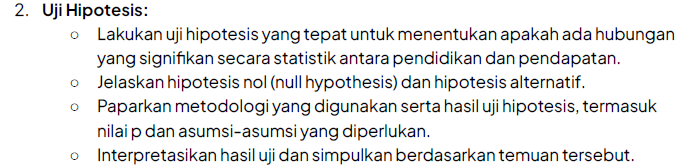

Karena ingin mengetahui apakah hubungan yang signifikan secara statistik antara pendidikan dan pendapatan maka uji hipotesis yang tepat menggunakan One-Way ANOVA. Tidak menggunakan T-Test karena untuk mengetahui perbedaan rata-rata dua kelompok. Sedangkan, tingkat pendidikan lebih dari dua kelompok maka menggunakan One-Way ANOVA.

### Distplot

<ipython-input-91-da4ba525b52c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Education', y='Income', data=data, palette="Set2", ci="sd")
<ipython-input-91-da4ba525b52c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Income', data=data, palette="Set2", ci="sd")


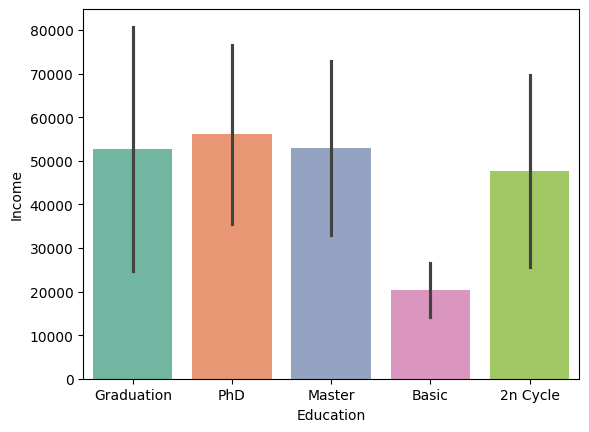

In [ ]:
#displot
sns.barplot(x='Education', y='Income', data=data, palette="Set2", ci="sd")
plt.show()

### KDE Plot

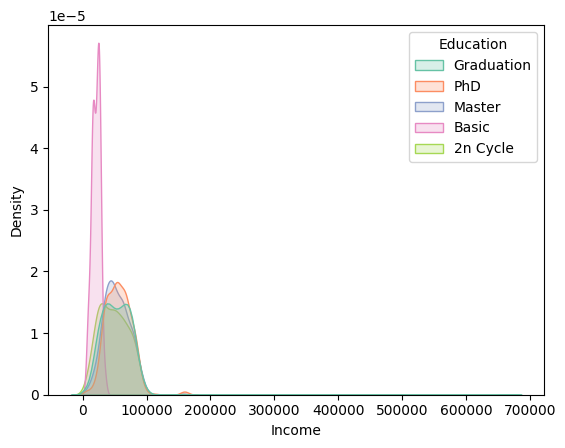

In [ ]:
#KDE Plot (lebih jelas)
sns.kdeplot(data=data, x='Income', hue='Education', fill=True, common_norm=False, palette="Set2")
plt.show()

- Gambar di atas (baik Distplot atau KDE plot) menunjukkan bahwa Pendapatan berdasarkan Tingkat Pendidikan yang berbeda terdapat variasi yang cukup besar. Dimana kita bisa ambil/prediksi **memungkinkan memang adanya indikasi Tingkat pendidikan memiliki hubungan terhadap income karena bentuk plot yang berbeda/cukup variasi**.
- Variansi dalam kelompok kecuali tingkat pendidikan 'basic' tergolong besar karena hampir mendekati rata-rata.
- Variansi antar kelompok untuk tingkat pendidikan 'basic; terhadap tingkat pendidikan lainnya tergolong besar karena rata-ratanya yang cukup berbeda, bahkan 'basic' memiliki puncak yang sangat besar dibandingkan yang lain.

Maka kita perlu ngecek dugaan sementara, apakah memang benar terdapat hubungan/tidak antar kedua variabel tersebut dengan ANOVA

## ANOVA ONE WAY

Hipotesis:
- Ho: Tidak terdapat hubungan yang signifikan secara statistik antara pendidikan dan pendapatan
- H1: Terdapat hubungan yang signifikan secara statistik antara pendidikan dan pendapatan

Taraf Signifikansi alfa = 5%

Statistik Uji:

In [ ]:
#ANOVA
data_uji = data[['Education','Income']]
anova_test = data_uji.anova(dv='Income', between='Education', detailed=True)
anova_test

,Source,SS,DF,MS,F,p-unc,np2
0,Education,6.690551e+10,4,1.672638e+10,27.966517,1.075202e-22,0.047666
1,Within,1.336722e+12,2235,5.980858e+08,NaN,NaN,NaN


In [ ]:
#Fhitung
print(f'Nilai Fhitung dari Statistik Uji ANOVA sebesar: {anova_test.F[0]}')

Nilai Fhitung dari Statistik Uji ANOVA sebesar: 27.966517368411704


In [ ]:
#Nilai P-value
print(f'Nilai P-value dari Fhitung yang didapatkan sebesar:', anova_test['p-unc'][0])

Nilai P-value dari Fhitung yang didapatkan sebesar: 1.075202108156874e-22


In [ ]:
#Mencari F tabel
from scipy.stats import f
ftabel = f.ppf(1-0.05,anova_test['DF'][0],anova_test['DF'][1])
print(f'Nilai Ftabel yang didapatkan sebesar:', ftabel)

Nilai Ftabel yang didapatkan sebesar: 2.3759092089932365


In [ ]:
#Keputusan
if anova_test['p-unc'][0] < 0.05:
    print('Tolak Ho')
else:
    print('Terima Ho')

Tolak Ho


Keputusan: Berdasarkan statistik uji anova didapatkan nilai **F hitung sebesar 27,9665** yang lebih besar dari **Ftabel F(5%;4;2211) sebesar 2,375952** dan diperkuat nilai p-value < 5%, maka diputuskan Tolak H0. Artinya **Terdapat hubungan yang signifikan secara statistik antara tingkat pendidikan dan pendapatan**.

Ternyata dugaan kita benar, bahwa memang indikasi terdapat hubungan yang signifikan antara pendidikan dan pendapatan. Hal ini, yang menyebabkan plot-plot sebelumnya cukup variasi.

 **Perlu diketahui, bahwa uji hipotesis diatas sudah dalam keadaan bersih dari missing value dan tidak dilakukan handling outlier.**






